# Mount Google Drive and Setup Environment

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
!pip install fancyimpute

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
from fancyimpute import KNN, NuclearNormMinimization, SoftImpute, BiScaler
from fancyimpute import MatrixFactorization, IterativeSVD, SimpleFill

### Load Files (train_data.zip and test_data.zip)

In [0]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving test_data.zip to test_data.zip
User uploaded file "test_data.zip" with length 4142757 bytes


In [0]:
#unzip datasets
!unzip train_data.zip
!unzip test_data.zip

Archive:  test_data.zip
replace test_data/.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: test_data/.DS_Store     
  inflating: __MACOSX/test_data/._.DS_Store  
  inflating: test_data/test_with_missing/545.csv  
  inflating: test_data/test_with_missing/223.csv  
  inflating: test_data/test_with_missing/237.csv  
  inflating: test_data/test_with_missing/551.csv  
  inflating: test_data/test_with_missing/579.csv  
  inflating: test_data/test_with_missing/1953.csv  
  inflating: test_data/test_with_missing/1947.csv  
  inflating: test_data/test_with_missing/586.csv  
  inflating: test_data/test_with_missing/1012.csv  
  inflating: test_data/test_with_missing/1774.csv  
  inflating: test_data/test_with_missing/1760.csv  
  inflating: test_data/test_with_missing/1006.csv  
  inflating: test_data/test_with_missing/592.csv  
  inflating: test_data/test_with_missing/1990.csv  
  inflating: test_data/test_with_missing/1748.csv  
  inflating: test_data/test_with_missing/2241.csv 

# Read Data
### Read Data if not already loaded. This will take a long time to run. Otherwise load data from saved csv files provided (joined_missing.csv, joined_groundtruth.csv)

#### Read Train Data with masked values

In [0]:
#Read Train Data with masked values

df = pd.DataFrame([],columns=['ptnum','time','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13']+masked_col)
df[masked_col] = False
for file in os.listdir("train_data/train_with_missing"):
    if file.endswith(".csv"):
        filepath = os.path.join("train_data/train_with_missing", file)
        df_pt = pd.read_csv(filepath)
        ptnum = int(file.split(".")[0])
        for i,x in naidx[naidx["pt.num"]==ptnum].iterrows():
          colname = "masked_"+x["test"]
          df_pt[colname] = False
          df_pt[colname].iloc[x["i"]-1] = True
          
        df_pt["ptnum"] = ptnum
        df = df.append(df_pt,ignore_index=True)
df.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [0]:
df = df.sort_values(['ptnum','time'],ascending=[1,1]).reset_index(drop=True)

In [0]:
df.to_csv("joined_missing.csv")

In [0]:
!cp joined_missing.csv drive/'My Drive'

#### Read Train Data Groundtruth values

In [0]:
#Read Data

df2 = pd.DataFrame([],columns=['ptnum','time','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13'])

for file in os.listdir("train_data/train_groundtruth"):
    if file.endswith(".csv"):
        filepath = os.path.join("train_data/train_groundtruth", file)
        df_pt = pd.read_csv(filepath)
        df_pt["ptnum"] = int(file.split(".")[0])
        df2 = df2.append(df_pt,ignore_index=True)

df2.head()

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,X1,X10,X11,X12,X13,X2,X3,X4,X5,X6,X7,X8,X9,ptnum,time
0,257.299713,25.195281,32.215241,2.053961,139.025796,6.597096,21.626622,185.656807,65.769721,16.239306,180.947542,112.822026,23.754316,2972,0
1,267.239935,24.910237,30.177517,1.896974,253.140305,5.972505,18.318042,187.835288,68.328155,16.372280,186.038002,148.055474,34.293775,2972,120
2,257.299713,25.765370,26.102070,1.739988,210.347364,5.972505,26.589492,182.389087,36.895966,9.457617,187.734822,101.422970,18.227527,2972,380
3,251.335580,26.050414,26.102070,1.739988,175.479042,6.284800,23.280912,183.478327,80.754835,21.026381,172.463442,169.817309,23.111666,2972,560
4,245.371447,26.905547,28.139794,2.053961,178.648889,5.504062,31.552362,184.567567,80.206599,21.425304,163.979342,134.583861,26.581976,2972,921


In [0]:
df2 = df2.sort_values(['ptnum','time'],ascending=[1,1]).reset_index(drop=True)

In [0]:
df2.to_csv("joined_groundtruth.csv")

In [0]:
!cp joined_groundtruth.csv drive/'My Drive'

# Load Data
#### Continue from here if you already have the csv files. Otherwise run read data above.

In [0]:
!cp drive/'My Drive'/joined_missing.csv .
!cp drive/'My Drive'/joined_groundtruth.csv .

In [0]:
df = pd.read_csv('joined_missing.csv',index_col=0)
df2 = pd.read_csv('joined_groundtruth.csv',index_col=0)

In [0]:
df.head()

,X1,X10,X11,X12,X13,X2,X3,X4,X5,X6,X7,X8,X9,masked_X1,masked_X10,masked_X11,masked_X12,masked_X13,masked_X2,masked_X3,masked_X4,masked_X5,masked_X6,masked_X7,masked_X8,masked_X9,ptnum,time
0,231.455136,21.489706,52.592477,3.937804,202.422745,7.065539,NaN,176.942885,74.724240,19.164741,160.585702,196.760533,15.656928,False,False,False,False,False,False,True,False,False,False,False,False,False,1,0
1,233.443180,21.489706,53.611339,3.937804,242.045839,6.284800,36.515232,176.942885,69.607372,17.303101,160.585702,187.434032,19.769887,False,False,False,False,False,False,False,False,False,False,False,False,False,1,225
2,229.467092,22.059795,54.630201,3.780817,261.064923,6.909391,36.515232,173.675164,67.962665,17.569049,155.495242,213.340979,28.124336,False,False,False,False,False,False,False,False,False,False,False,False,False,1,800
3,225.491003,22.344839,49.535892,3.309856,199.252898,6.597096,34.860942,172.585924,64.855995,16.505255,158.888882,207.123312,25.296676,False,False,False,False,False,False,False,False,False,False,False,False,False,1,1515
4,231.455136,22.202317,34.252965,2.838896,188.158431,6.597096,43.132392,179.121366,62.663051,15.973358,160.585702,195.724255,19.127237,False,False,False,False,False,False,False,False,False,False,False,False,False,1,3013


In [0]:
df2.head()

,X1,X10,X11,X12,X13,X2,X3,X4,X5,X6,X7,X8,X9,ptnum,time
0,231.455136,21.489706,52.592477,3.937804,202.422745,7.065539,31.552362,176.942885,74.724240,19.164741,160.585702,196.760533,15.656928,1,0
1,233.443180,21.489706,53.611339,3.937804,242.045839,6.284800,36.515232,176.942885,69.607372,17.303101,160.585702,187.434032,19.769887,1,225
2,229.467092,22.059795,54.630201,3.780817,261.064923,6.909391,36.515232,173.675164,67.962665,17.569049,155.495242,213.340979,28.124336,1,800
3,225.491003,22.344839,49.535892,3.309856,199.252898,6.597096,34.860942,172.585924,64.855995,16.505255,158.888882,207.123312,25.296676,1,1515
4,231.455136,22.202317,34.252965,2.838896,188.158431,6.597096,43.132392,179.121366,62.663051,15.973358,160.585702,195.724255,19.127237,1,3013


## EDA (Exploratory Data Analysis)

### Finding number of NaN values in each feature (Groundtruth)

In [0]:
print("Groundtruth NA values")
for i in range(1,14):
  print("X"+str(i),df2["X"+str(i)].isna().sum())

Groundtruth NA values
X1 1708
X2 1935
X3 2019
X4 1821
X5 17978
X6 21778
X7 21983
X8 21008
X9 21317
X10 22166
X11 1083
X12 1014
X13 3933


### Finding number of NaN values in each feature (Masked Data)

In [0]:
print("Missing NA values")
for i in range(1,14):
  print("X"+str(i),df["X"+str(i)].isna().sum())

Missing NA values
X1 7708
X2 7935
X3 8019
X4 7821
X5 23978
X6 27778
X7 27983
X8 27008
X9 27317
X10 28166
X11 7083
X12 7014
X13 9933


### Distribution of Values for each feature
#### We can see that both masked and groundtruth follow the same distribution

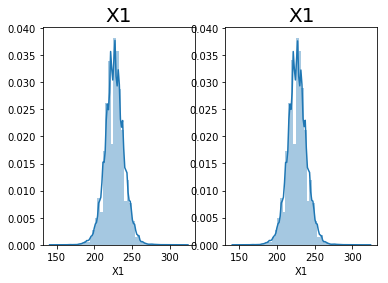

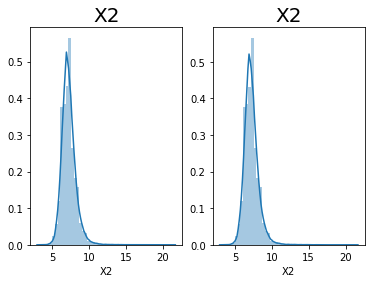

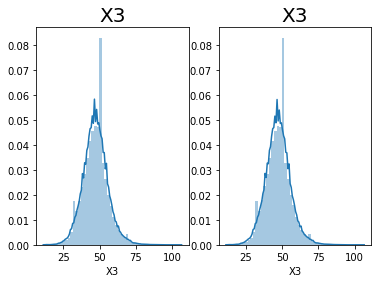

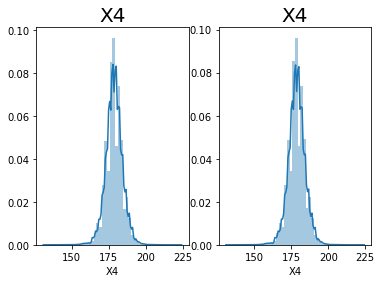

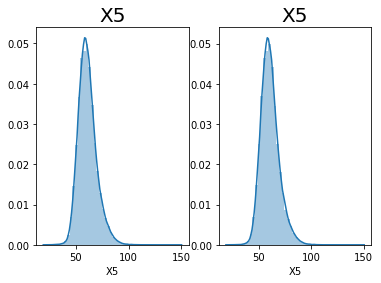

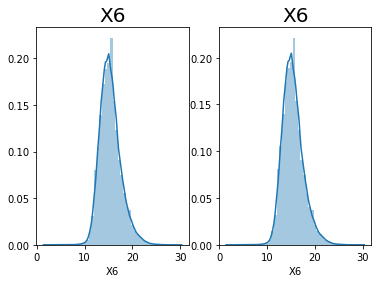

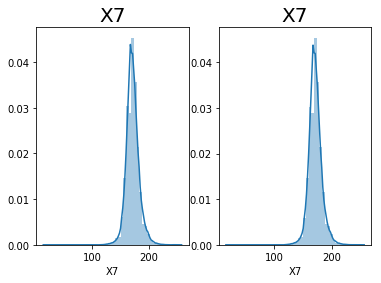

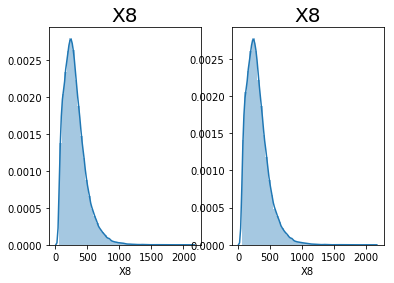

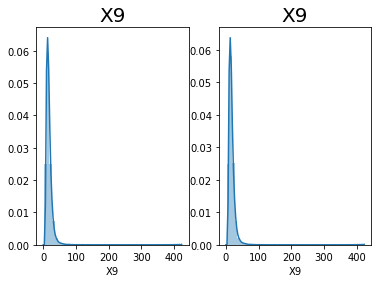

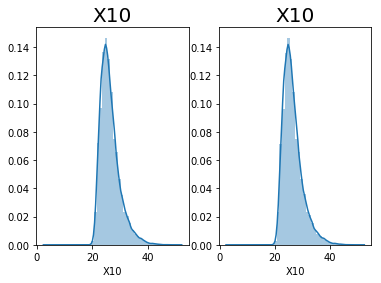

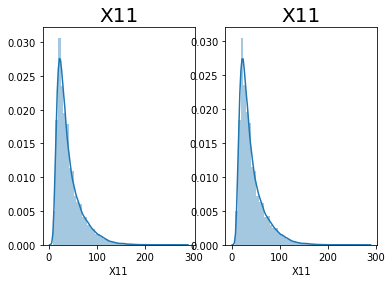

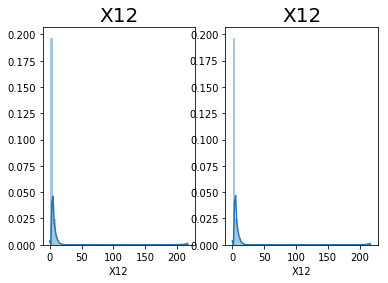

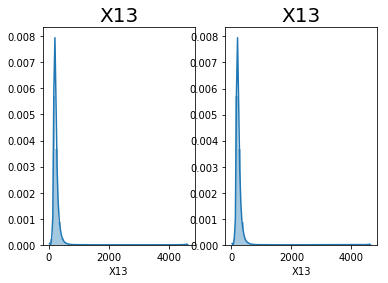

In [0]:
for i in range(1,14):
  feature = df2["X"+str(i)]
  feature = feature.dropna()
  plt.figure()
  plt.subplot(1,2,1)
  sns.distplot(feature)
  plt.title("X"+str(i), fontsize=20)
  
  feature = df["X"+str(i)]
  feature = feature.dropna()
  plt.subplot(1,2,2)
  sns.distplot(feature)
  plt.title("X"+str(i), fontsize=20)
  plt.plot()

### BoxPlot (Distribution) of Number of Records per Patient

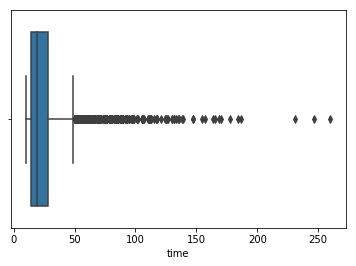

In [0]:
sns.boxplot(df.groupby("ptnum").count()["time"])

### Summarization of Number of Records for all patients

In [0]:
df.groupby("ptnum").count()["time"].describe()


count    6000.000000
mean       24.165500
std        17.640436
min        10.000000
25%        14.000000
50%        19.000000
75%        28.000000
max       260.000000
Name: time, dtype: float64

### Time Difference between consecutive records

In [0]:
patient_all_timediff = []
for i in range(1,6001):
  patient = df[df["ptnum"]==i]
  patient = patient.reset_index(drop=True)
  patient["timediff"] = [0]+[patient["time"][i]-patient["time"][i-1] for i in range(1,len(patient))]
  patient_all_timediff.extend(patient["timediff"].values)


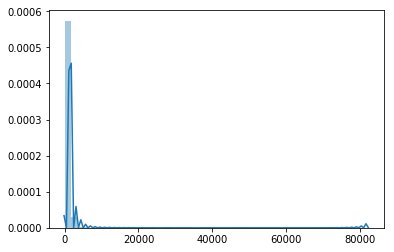

In [0]:
sns.distplot(patient_all_timediff)

### Correlation Heatmap between features

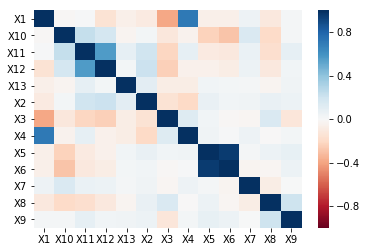

In [0]:
sns.heatmap(df.iloc[:,0:13].corr(),cmap="RdBu",vmax=1,vmin=-1)

# Feature Engineering
### Add new relevant features to improve performance
### The following things are done:
### 1. Normalization - Min max scale values between 0 and 1 (per Patient)
### 2. Time Difference (Window) - Find time difference between k-windowed records per patient
### 3. Time Difference Median - Find time difference from the median time for each record per patient.

## Normalize

In [0]:
def normalize(df_col,df_col_gt=None,returnmin=False):
  """
  Normalize given column using MinMaxScaling
  """
  min_val = np.min(df_col)
  max_val = np.max(df_col)
  df_col = df_col.map(lambda x: (x-min_val)/(max_val-min_val) if x else x)
  if df_col_gt is not None:
    df_col_gt = df_col_gt.map(lambda x: (x-min_val)/(max_val-min_val) if x else x)
    if returnmin:
      return df_col,df_col_gt,min_val,max_val
    else:
      return df_col,df_col_gt
  if returnmin:
    return df_col,min_val,max_val
  else:
    return df_col


## Time Difference (Window)

In [0]:
def time_diff_window(time,ptnum,window=None,median=False):
  timediff_all = []
  for i in set(ptnum):
    time_pat = time[ptnum==i]
    if median:
      timediff=[]
      median_time = time_pat.median()
      for j in range(len(time_pat)):
        timediff.append(abs(time_pat.iloc[j]-median_time))
      timediff_all.extend(timediff)
    else:
      timediff = [0]*window
      for j in range(window,len(time_pat)):
        timediff.append(time_pat.iloc[j]-time_pat.iloc[j-window])
      timediff_all.extend(timediff)
  return pd.Series(timediff_all)

### Perform all feature engineering on input dataframe

In [0]:
def feature_engg(inputdf,inputdf_gt=None,returnmin=False):
  inputdf["timediff_1"] = time_diff_window(inputdf["time"],inputdf["ptnum"],1)
  inputdf["timediff_5"] = time_diff_window(inputdf["time"],inputdf["ptnum"],5)
  inputdf["timediff_median"] = time_diff_window(inputdf["time"],inputdf["ptnum"],median=True)
  mins={}
  maxs={}
  for i in range(len(inputdf.columns)):
    if inputdf.columns[i] not in ['time','ptnum']:
      if inputdf_gt is not None:
        if not returnmin:
          inputdf.iloc[:,i], inputdf_gt.iloc[:,i] = normalize(inputdf.iloc[:,i],inputdf_gt.iloc[:,i],returnmin=returnmin)
        else:
          inputdf.iloc[:,i], inputdf_gt.iloc[:,i], min_val,max_val = normalize(inputdf.iloc[:,i],inputdf_gt.iloc[:,i],returnmin=returnmin)
      else:
        if not returnmin:
          inputdf.iloc[:,i] = normalize(inputdf.iloc[:,i],returnmin=returnmin)
        else:
          inputdf.iloc[:,i], min_val, max_val = normalize(inputdf.iloc[:,i],returnmin=returnmin)
      if returnmin:
        mins[inputdf.columns[i]] = min_val
        maxs[inputdf.columns[i]] = max_val
  
  if returnmin:
    return mins,maxs
  
  

### NRMS Evaluation criteria per Feature

In [0]:
def nrms(masked, imputed, groundtruth,ptnum):
  sum_values=0
  count=0
  for i in range(len(imputed)):
    if masked[i]:
      patient_vals = groundtruth[ptnum==ptnum[i]]
      max_v = max(patient_vals[~np.isnan(patient_vals)])
      min_v = min(patient_vals[~np.isnan(patient_vals)])
      count+=1
      sum_values += (abs(imputed[i]-groundtruth[i])/(max_v-min_v))**2
      
  return np.sqrt(sum_values/sum(masked))
      
      
  

# Impute Missing Values (Model Selection)
### Use fancyimpute library and various models inside the library to find the best model per analyte. The following models are tested:
### 1. SimpleFill (substitute with mean)
### 2. KNN
### 3. SoftImpute
### 4. BiScaler+SoftImpute

In [0]:
warnings.simplefilter(action='ignore', category=Warning)
pd.reset_option('all')

html.border has been deprecated, use display.html.border instead
(currently both are identical)


: boolean
    use_inf_as_null had been deprecated and will be removed in a future
    version. Use `use_inf_as_na` instead.



In [0]:
best_models = {
    KNN(3,verbose=False):['X8','X9','X11'],
    KNN(4,verbose=False):['X1','X3','X7','X10','X12'],
    KNN(6,verbose=False):['X2'],
    KNN(8,verbose=False):['X13'],
    SoftImpute(verbose=False):['X4'],
    SoftImpute(verbose=False):['X5','X6']
}

### Run on Train

In [0]:

knndf = pd.DataFrame([],columns=['ptnum','time','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13'])
knndf_gt = pd.DataFrame([],columns=['ptnum','time','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13'])
for file in os.listdir("train_data/train_with_missing"):
    if file.endswith(".csv"):
        filepath = os.path.join("train_data/train_with_missing", file)
        df_pt = pd.read_csv(filepath)
        filepath = os.path.join("train_data/train_groundtruth", file)
        df_gt = pd.read_csv(filepath)
        ptnum = int(file.split(".")[0])
        df_oth = df_pt.iloc[:,1:]
        df_time = df_pt.iloc[:,0]
        df_pt = pd.concat([df_oth,df_time],axis=1)
        df_oth = df_gt.iloc[:,1:]
        df_time = df_gt.iloc[:,0]
        df_gt = pd.concat([df_oth,df_time],axis=1)
        df_pt["ptnum"] = ptnum
        df_gt["ptnum"] = ptnum
        mins,maxs = feature_engg(df_pt,returnmin=True)
        df_numeric = df_pt.select_dtypes(include=[np.float]).as_matrix()
        df_imputed = pd.DataFrame(index=df_pt.index,columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13'])
        for i,model in enumerate(best_models):
          if i != 5:
            df_filled = pd.DataFrame(model.fit_transform(df_numeric), columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','timediff_1','timediff_5','timediff_median'])
          else:
            df_filled = pd.DataFrame(model.fit_transform(df_numeric[:,0:13]), columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13'])
          for col in best_models[model]:
            df_imputed[col] = df_filled[col]
    
        df_imputed["ptnum"] = df_pt["ptnum"]
        df_imputed["time"] = df_pt["time"]
        
        for i in range(len(df_imputed.columns)):
          name = df_imputed.iloc[:,i].name
          if name in maxs:
            max_val = maxs[name]
            min_val = mins[name]
            df_imputed[name] = df_imputed[name].map(lambda x: x*(max_val-min_val) + min_val)
        
        knndf = knndf.append(df_imputed,ignore_index=True)
        knndf_gt = knndf_gt.append(df_gt,ignore_index=True)
        
        
knndf = knndf.sort_values(['ptnum','time'],ascending=[1,1]).reset_index(drop=True)
knndf_gt = knndf_gt.sort_values(['ptnum','time'],ascending=[1,1]).reset_index(drop=True)

23
5683
1093
4952
351
4094
1809
3840
5089
2654
2714
2197
1120
1619
3887
2772
1945
4178
2616
294
5572
3117
538
1607
5769
5625
1773
5226
2747
1702
4124
3205
697
1172
2845
3733
5426
5521
1602
2928
4003
2743
2145
3141
1784
3614
4922
3366
5066
1124
3822
348
2129
3919
339
5410
4606
148
2372
806
1246
1903
1263
4832
4188
5959
923
1238
3371
1405
408
1678
35
1242
1001
1889
5694
4405
5834
3091
3859
1320
4294
3771
3679
5966
5129
5460
3171
944
2832
3845
4212
1628
3359
3959
4500
3334
5252
4363
1514
4239
3854
2457
2127
195
4914
293
2781
5478
3585
644
5248
4577
709
2898
2662
5330
1676
402
4384
521
545
5678
3888
3228
3403
5841
3575
2065
1119
5187
5399
3418
2564
1155
2596
1034
5763
4312
1562
1024
5588
3746
736
3478
4826
5203
2500
1077
3532
4610
4970
1921
2173
2820
598
2631
5881
1458
547
1813
634
1886
1648
2882
325
3501
5762
934
1328
5853
5292
4318
424
2471
859
1942
541
4006
2462
4739
1947
4819
3206
777
3830
891
2176
4855
5060
5112
5798
303
4974
109
2876
978
5795
2663
3224
5892
4108
1541
3223
1318
3940
5

# Evaluate NRMS
### Print nrms per feature and average nrms

In [0]:
imputed = knndf.copy()
rmsList = []
for i in range(1,14):
  print(i)
  imputed["X"+str(i)+"_groundtruth"] = knndf_gt["X"+str(i)]
  imputed["X"+str(i)+"_masked"] = df["masked_X"+str(i)]
  rms = nrms(imputed["X"+str(i)+"_masked"],imputed["X"+str(i)],imputed["X"+str(i)+"_groundtruth"],imputed["ptnum"])
  print(rms)
  rmsList.append(rms)
rmsList

1
0.1988723590641921
2
0.23981178048073526
3
0.22222734248985532
4
0.21312969602951598
5
0.16875305876375324
6
0.16975303230513802
7


# HYPERPARAMETER TUNING
### Run this code if you want to do hyperparameter tuning. Change the model parameter to test different models

In [0]:
model = KNN(3,verbose=False) #or different k or SoftImpute or BiScaler or SimpleFill

In [0]:
min_rms = float('inf')
min_k = -1
for k in range(2,11):
  model = KNN(k,verbose=False) #or different k or SoftImpute or BiScaler or SimpleFill
  #Read Data
  knndf = pd.DataFrame([],columns=['ptnum','time','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','timediff_1','timediff_5','timediff_median'])
  for file in os.listdir("train_data/train_with_missing"):
      if file.endswith(".csv"):
          filepath = os.path.join("train_data/train_with_missing", file)
          df_pt = pd.read_csv(filepath)
          ptnum = int(file.split(".")[0])
          df_oth = df_pt.iloc[:,1:]
          df_time = df_pt.iloc[:,0]
          df_pt = pd.concat([df_oth,df_time],axis=1)
          df_pt["ptnum"] = ptnum
          mins,maxs = feature_engg(df_pt,returnmin=True)
          df_numeric = df_pt.select_dtypes(include=[np.float]).as_matrix()
          df_filled = pd.DataFrame(model.fit_transform(df_numeric), columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','timediff_1','timediff_5','timediff_median'])
          df_filled["ptnum"] = df_pt["ptnum"]
          df_filled["time"] = df_pt["time"]

          for i in range(13):
            name = df_filled.iloc[:,i].name
            max_val = maxs[name]
            min_val = mins[name]
            df_filled[name] = df_filled[name].map(lambda x: x*(max_val-min_val) + min_val)

          knndf = knndf.append(df_filled,ignore_index=True)

  knndf = knndf.sort_values(['ptnum','time'],ascending=[1,1]).reset_index(drop=True)
  #Evaluate
  imputed = knndf.copy()
  rmsList = []
  for i in range(1,14):
    imputed["X"+str(i)+"_groundtruth"] = df2["X"+str(i)]
    imputed["X"+str(i)+"_masked"] = df["masked_X"+str(i)]
    rms = nrms(imputed["X"+str(i)+"_masked"],imputed["X"+str(i)],imputed["X"+str(i)+"_groundtruth"],imputed["ptnum"])
    print(k,i,rms)
    rmsList.append(rms)
  print(k,rmsList)
  avgrms = np.mean(rmsList)
  print(avgrms)
  if avgrms < min_rms:
    min_rms = avgrms
    min_k=k
    
  

5 1 0.19966128763993907
5 2 0.24012453430135106
5 3 0.22214059895110455
5 4 0.2167487085105819
5 5 0.2075978932674551
5 6 0.20861775729056667
5 7 0.25208684506001816
5 8 0.20838632195970686
5 9 0.23304223387594877
5 10 0.22069027628747098
5 11 0.19663039571997615
5 12 0.21924851503311335
5 13 0.2608703189122414
5 [0.19966128763993907, 0.24012453430135106, 0.22214059895110455, 0.2167487085105819, 0.2075978932674551, 0.20861775729056667, 0.25208684506001816, 0.20838632195970686, 0.23304223387594877, 0.22069027628747098, 0.19663039571997615, 0.21924851503311335, 0.2608703189122414]
0.2219881297545749
6 1 0.2023913430864276
6 2 0.2398117804807353
6 3 0.2233002977998558
6 4 0.2179671492676617
6 5 0.20984929388998613
6 6 0.21116452910882566
6 7 0.2526595729604311
6 8 0.21348293698714813
6 9 0.23429598156638515
6 10 0.22423181583947402
6 11 0.20067199483614062
6 12 0.22138984628579786
6 13 0.2598394619835503
6 [0.2023913430864276, 0.2398117804807353, 0.2233002977998558, 0.2179671492676617, 0.

# Run on Test

In [0]:

testImpute = pd.DataFrame([],columns=['ptnum','time','X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13'])
for file in os.listdir("test_data/test_with_missing"):
    if file.endswith(".csv"):
        filepath = os.path.join("test_data/test_with_missing", file)
        df_pt = pd.read_csv(filepath)
        ptnum = int(file.split(".")[0])
        df_oth = df_pt.iloc[:,1:]
        df_time = df_pt.iloc[:,0]
        df_pt = pd.concat([df_oth,df_time],axis=1)
        df_pt["ptnum"] = ptnum

        mins,maxs = feature_engg(df_pt,returnmin=True)
        df_numeric = df_pt.select_dtypes(include=[np.float]).as_matrix()
        df_imputed = pd.DataFrame(index=df_pt.index,columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13'])
        for i,model in enumerate(best_models):
          if i != 5:
            df_filled = pd.DataFrame(model.fit_transform(df_numeric), columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13','timediff_1','timediff_5','timediff_median'])
          else:
            df_filled = pd.DataFrame(model.fit_transform(df_numeric[:,0:13]), columns=['X1','X2','X3','X4','X5','X6','X7','X8','X9','X10','X11','X12','X13'])
          for col in best_models[model]:
            df_imputed[col] = df_filled[col]
    
        df_imputed = pd.concat([pd.Series(df_pt["time"],index=df_pt.index,name="time"),df_imputed],axis=1)
        
        for i in range(len(df_imputed.columns)):
          name = df_imputed.iloc[:,i].name
          if name in maxs:
            max_val = maxs[name]
            min_val = mins[name]
            df_imputed[name] = df_imputed[name].map(lambda x: x*(max_val-min_val) + min_val)
        
        if not os.path.exists('test_imputed'):
            os.makedirs('test_imputed')
        df_imputed.to_csv('test_imputed/'+str(ptnum)+'.csv',index=False)
        
        testImpute = testImpute.append(df_imputed,ignore_index=True)
        
        
testImpute = testImpute.sort_values(['ptnum','time'],ascending=[1,1]).reset_index(drop=True)
print(testImpute.head())

23
1093
351
1809
2197
1120
1619
1945
294
538
1607
1773
1702
697
1172
1602
2145
1784
1124
348
2129
339
148
806
1246
1903
1263
923
1238
1405
408
1678
35
1242
1001
1889
1320
944
1628
1514
2127
195
293
644
709
